In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

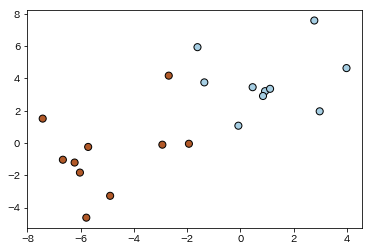

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

In [3]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict', clim=(None, None)):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif type == 'probability':
        Z = np.exp(clf.predict_log_proba(np.c_[XX.ravel(), YY.ravel()]))[:, 1]
    else:
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else:
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()
            plt.clim(clim[0], clim[1])

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [4]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

SVC の C は Classfication のこと

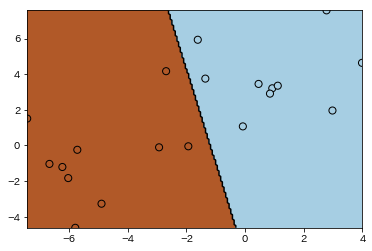

In [5]:
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf) # 境界線の描画

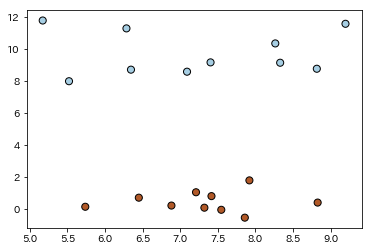

In [6]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=8   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

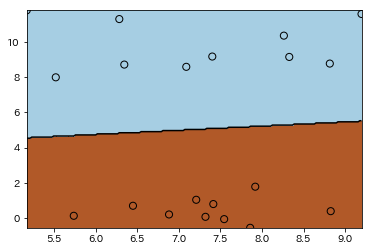

In [7]:
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

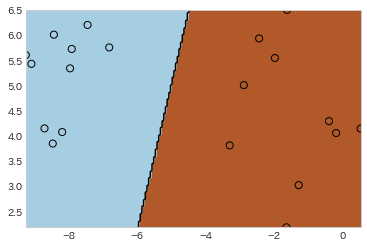

In [57]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=7   # 乱数種（再現用）
                 )
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

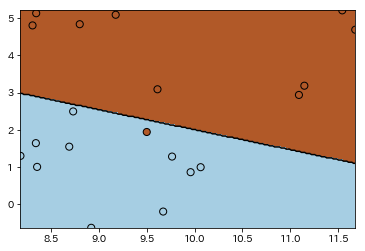

In [9]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=4   # 乱数種（再現用）
                 )

clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

In [10]:
from IPython.display import HTML
HTML('<iframe scrolling="no" src="https://www.geogebra.org/material/iframe/id/sqPXpNUQ/width/994/height/536/border/888888/sri/true/sdz/true" width="994px" height="536px" style="border:0px;"> </iframe>')

ヒンジ関数は以下参照

http://ibisforest.org/index.php?%E3%83%92%E3%83%B3%E3%82%B8%E9%96%A2%E6%95%B0

In [11]:

def plotSVMBoundary(X, clf, mesh=True, boundary=True):
    
    # if SVM, draw margine lines
    colors = ['k']*3
    linestyles = ['-']*3
    levels = [-1, 0, 1]
    # if SVM, plot support vecters
    plt.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1],
                s=80, facecolors='none', edgecolors='k') # facecolors='none' は点の内部を塗りつぶすさないと言うこと。
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z>0, cmap=plt.cm.Paired, zorder=-10) # Z>0 のTrue, False で二つに分けてぬり分ける。
    if boundary:
        plt.contour(XX, YY, Z, 
                    colors=colors,
                    linestyles=linestyles,
                    levels=levels) # draw lines (level=0:boundary, level=+-1:margine lines)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [12]:
# 以下、True, Falseでぬりわけできるか確認。
xx, yy=np.mgrid[-1:1:200j, -1:1:200j]
z=[True if x*y>0 else False for x, y in zip(xx.ravel(), yy.ravel())]

In [13]:
xx

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.98994975, -0.98994975, -0.98994975, ..., -0.98994975,
        -0.98994975, -0.98994975],
       [-0.9798995 , -0.9798995 , -0.9798995 , ..., -0.9798995 ,
        -0.9798995 , -0.9798995 ],
       ..., 
       [ 0.9798995 ,  0.9798995 ,  0.9798995 , ...,  0.9798995 ,
         0.9798995 ,  0.9798995 ],
       [ 0.98994975,  0.98994975,  0.98994975, ...,  0.98994975,
         0.98994975,  0.98994975],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [14]:
yy

array([[-1.        , -0.98994975, -0.9798995 , ...,  0.9798995 ,
         0.98994975,  1.        ],
       [-1.        , -0.98994975, -0.9798995 , ...,  0.9798995 ,
         0.98994975,  1.        ],
       [-1.        , -0.98994975, -0.9798995 , ...,  0.9798995 ,
         0.98994975,  1.        ],
       ..., 
       [-1.        , -0.98994975, -0.9798995 , ...,  0.9798995 ,
         0.98994975,  1.        ],
       [-1.        , -0.98994975, -0.9798995 , ...,  0.9798995 ,
         0.98994975,  1.        ],
       [-1.        , -0.98994975, -0.9798995 , ...,  0.9798995 ,
         0.98994975,  1.        ]])

In [15]:
np.unique(z)

array([False,  True], dtype=bool)

In [16]:
z = np.array(z).reshape(xx.shape)
z

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]], dtype=bool)

In [17]:
z.shape

(200, 200)

In [18]:
xx.shape

(200, 200)

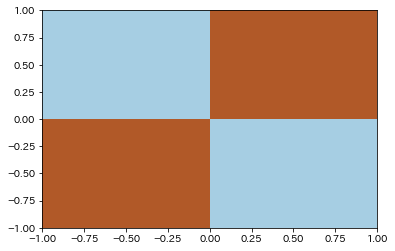

In [19]:
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired, zorder=-10)

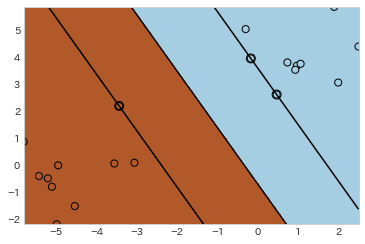

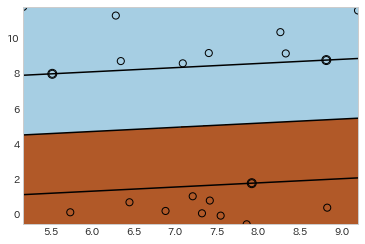

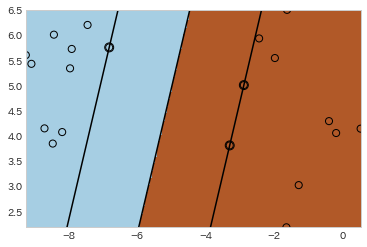

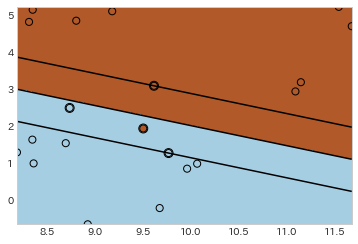

In [58]:
clf = SVC(kernel='linear')

for rs in [3,8,7,4]:

    X, y = make_blobs(n_samples=20, # 20個生成
                      n_features=2, # 2次元
                      centers=2,    # クラスタ中心2個
                      cluster_std =1, # クラスタの大きさ（標準偏差）
                      random_state=rs   # 乱数種（再現用）
                     )
    clf.fit(X,y)

    plotSVMBoundary(X, clf)

    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

    plt.show()

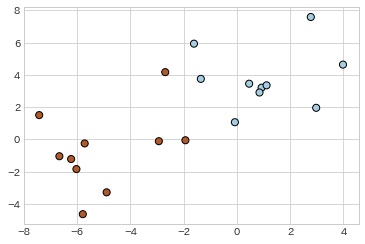

In [59]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

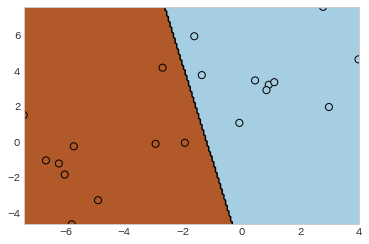

In [60]:
clf.probability = True # SVM で確率を計算するためには学習前にprobability をTrue　にする必要がある。
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf) # 境界線の描画

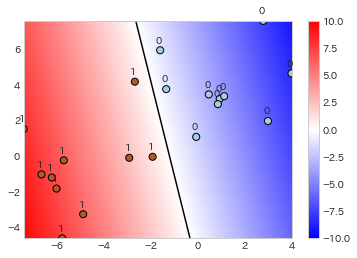

In [67]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="value", clim=(-10, 10))

for l, dx, dy in zip(y, X[:,0], X[:, 1]):
    plt.annotate(l, xy=(dx, dy), xytext=(dx-0.2, dy+0.4)) # plot label 

`decision_function`は、
\\[
\boldsymbol{w}^T \boldsymbol{x} + b
\\]
を返す。（クラス１を正になるように）

これはデータ点$x$と識別超平面からの距離
\\[
\frac{\left|\boldsymbol{w}^T \boldsymbol{x} + b\right|}{\| \boldsymbol{w} \|}
\\]
の $\|\boldsymbol{w}\|$ 倍されたもので正負つき（絶対値のないもの）を表す。

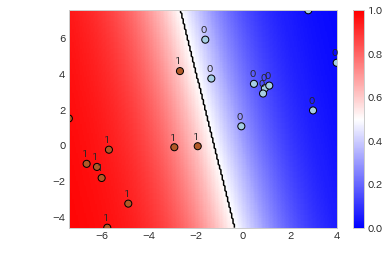

In [68]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="probability", clim=(0,1))

for l, dx, dy in zip(y, X[:,0], X[:, 1]):
    plt.annotate(l, xy=(dx-0.2, dy+0.4)) # plot label

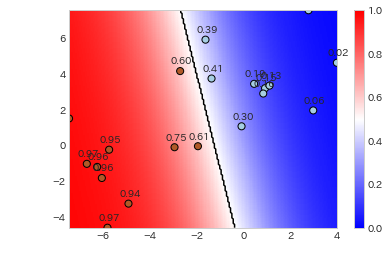

In [69]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="probability", clim=(0,1))

X_test_value = np.exp(clf.predict_log_proba(X))[:, 1]
# X_test_value = clf.predict_proba(X)[:, 1] 上のコードと同じこと.

for l, dx, dy in zip(X_test_value, X[:,0], X[:, 1]):
    plt.annotate("{0:.2f}".format(l), xy=(dx-0.4, dy+0.4)) # plot probabilities

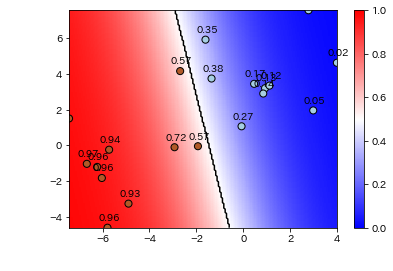

In [26]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="probability", clim=(0,1))

# X_test_value = np.exp(clf.predict_log_proba(X))[:, 1]
X_test_value = clf.predict_proba(X)[:, 1] 

for l, dx, dy in zip(X_test_value, X[:,0], X[:, 1]):
    plt.annotate("{0:.2f}".format(l), xy=(dx-0.4, dy+0.4)) # plot probabilities

`predict_proba` は識別超平面との距離$\boldsymbol{w}^T\boldsymbol{x} + b$をシグモイド関数

\\[
\sigma(\boldsymbol{x}) = \frac{1}{1 + \exp(-\boldsymbol{w}^T\boldsymbol{x} + b)}
\\]

に代入しているだけ。ロジスティック回帰は確率をモデル化するようにしたので、識別超平面との距離$\boldsymbol{w}^T\boldsymbol{x} + b$をシグモイド関数に代入した`priddict_proba`は確率としての意味をもつ。しかしこの場合はただ、距離をシグモイド関数に代入しただけなので、これが本当に確率を示しているかは疑問が残るので注意。

$b$

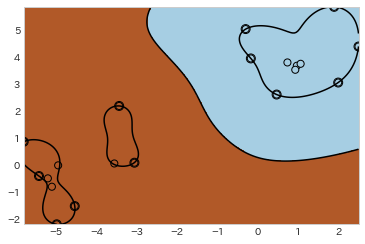

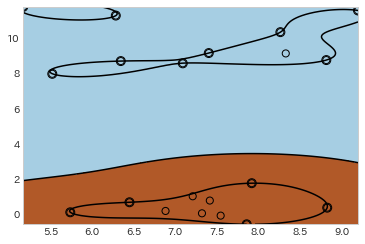

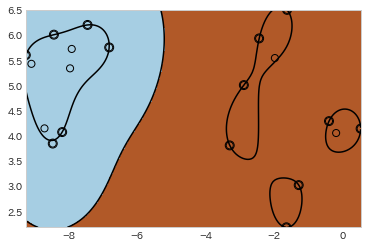

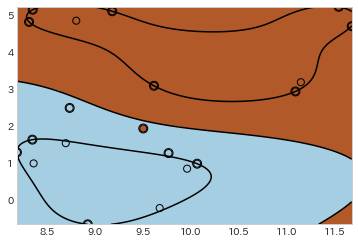

In [70]:
# カーネル関数を用いて識別面を非線形化してみる
for rs in [3,8,7,4]:

    X, y = make_blobs(n_samples=20, # 20個生成
                      n_features=2, # 2次元
                      centers=2,    # クラスタ中心2個
                      cluster_std =1, # クラスタの大きさ（標準偏差）
                      random_state=rs   # 乱数種（再現用）
                     )

    clf.kernel = 'rbf' # default  ガウスカーネル

    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    
    plt.show()

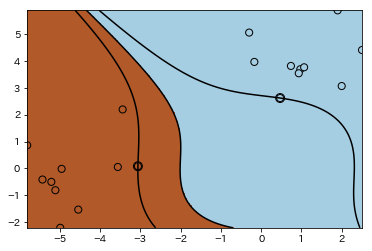

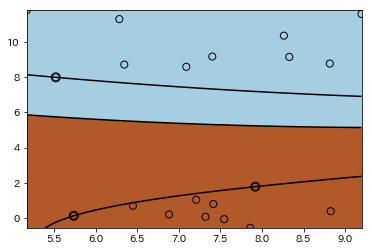

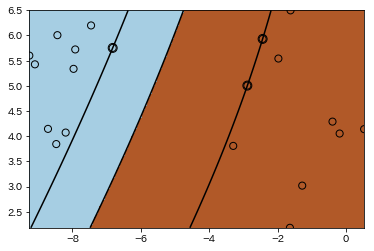

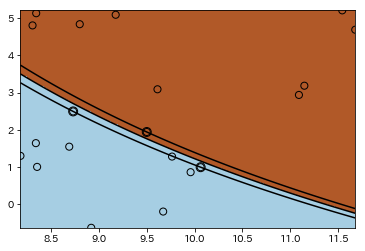

In [28]:
for rs in [3,8,7,4]:

    X, y = make_blobs(n_samples=20, # 20個生成
                      n_features=2, # 2次元
                      centers=2,    # クラスタ中心2個
                      cluster_std =1, # クラスタの大きさ（標準偏差）
                      random_state=rs   # 乱数種（再現用）
                     )
    clf.kernel = 'poly' # 多項式カーネル
    
    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    
    plt.show()

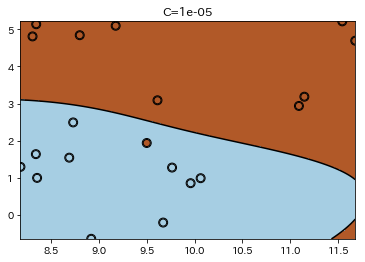

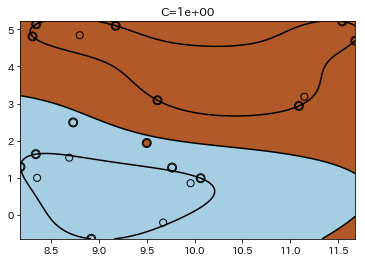

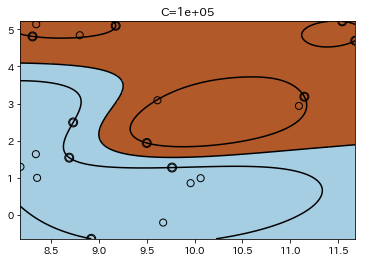

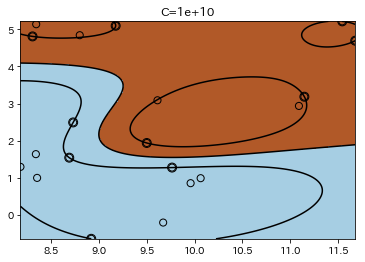

In [29]:
for C in [1e-5, 1, 1e5, 1e10]:

    X, y = make_blobs(n_samples=20, # 20個生成
                      n_features=2, # 2次元
                      centers=2,    # クラスタ中心2個
                      cluster_std =1, # クラスタの大きさ（標準偏差）
                      random_state=4   # 乱数種（再現用）
                     )
    clf.kernel = 'rbf'
    
    clf.C = C
    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plt.title("C={0:.0e}".format(C))
    
    plt.show()

上からわかるように、パラメータCを大きくすると、複雑な境界線をかくようになり、再代入誤差が小さくなるようにする。

In [30]:
# ガンのデータについて識別してみる。
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [31]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [32]:
clf = SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
clf.kernel = 'linear'

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296

In [34]:
clf.kernel = 'rbf' # default

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.58771929824561409

SVM　の悪いところはデフォルトではあまり良い識別能力を出さない。

RBF はたくさんのパラメーターがあり、うまく選ばないと認識能力が上がらない。

最初にSVMをするなら
```python
    clf.set_params(kernel='linear').fit(X,y)
```
として、線形SVMをすべき。

In [35]:
# clf.kernel = 'poly'

# clf.fit(X_train, y_train) # 終わらない！
# clf.score(X_test, y_test)

スケーリングしていないので、多項式を作ると値が非常に大きくなり、数値計算的に不安定になる。

よって、学習がいつまでたっても収束しない。

In [36]:
# スケーリングしてみる。
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale  = scaler.transform(X_test)

In [37]:
clf.kernel = 'linear'

clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.96491228070175439

In [38]:
clf.kernel = 'rbf'

clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.95614035087719296

In [39]:
clf.kernel = 'poly'

clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)
# スケーリングして、値が[0, 1]の範囲に収まるようにしたので、収束するようになった。

0.61403508771929827

それでは、標準化ではどうか。

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std  = scaler.transform(X_test)

In [41]:
clf.kernel = 'linear'

clf.fit(X_train_std, y_train)
clf.score(X_test_std, y_test)

0.98245614035087714

In [42]:
clf.kernel = 'rbf'

clf.fit(X_train_std, y_train)
clf.score(X_test_std, y_test)

0.98245614035087714

In [43]:
clf.kernel = 'poly'

clf.fit(X_train_std, y_train)
clf.score(X_test_std, y_test)

0.90350877192982459

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
kernels = ['linear', 'rbf', 'poly']
scores_mean = []
scores_std = []
for kernel in kernels:
    clf.set_params(kernel=kernel).fit(X_train_std, y_train)
    score = cross_val_score(clf, X_test_std, y_test, cv=5)
    scores_mean.append(score.mean())
    scores_std.append(score.std())
scores_mean

[0.92196969696969688, 0.93787878787878787, 0.81666666666666676]

In [46]:
import seaborn as sns
sns.set_style('whitegrid')

In [47]:
import pandas as pd

In [48]:
frame1 = pd.DataFrame(scores_mean, columns=['mean'])
frame2 = pd.DataFrame(scores_std, columns=['std'])
frame3 = pd.Series(kernels, name='kernel')
Frame = pd.concat([frame1, frame2, frame3], axis=1)
Frame

,mean,std,kernel
0,0.921970,0.041605,linear
1,0.937879,0.067488,rbf
2,0.816667,0.037237,poly


(0.7, 1)

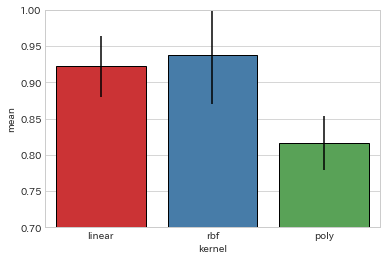

In [49]:
sns.barplot(x='kernel', y='mean', data=Frame, yerr=Frame.iloc[:, 1], palette='Set1')
plt.ylim(0.7, 1)